We have combed through the scientific data and predictions we will be comparing our Starbucks Customer data.

We decided to first clean the data. There were lots of missing values(NaN). Since most of the values were around the same, we decided to just fill the NaN values with the mean values. Next we analyzed the dataset by using a histogram, scatterplots, joint plots, and a boxplot.


In [1]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


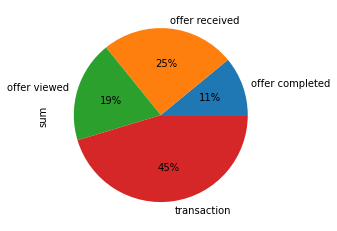

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

port = pd.read_csv("portfolio.csv")
trans = pd.read_csv("transcript.csv")
prof = pd.read_csv("profile.csv")
trans

trans2 = trans.copy()
trans2["sum"] = 1
fi, ax = plt.subplots()
trans2_plot = trans2.groupby("event").sum()["sum"].plot.pie(autopct='%.0f%%')
trans2_plot
trans


Predicting how much a customer will spend (based on the age, income, and sex):

In [3]:
#since we are predciting transactions, we seperate the transactions from the rest of the dataset
df = trans.copy().reset_index()

#merge profile and transcript by customer id so that we have demographics of each person who made a transaction
df = df.merge(prof, left_on="person", right_on="id")[
    ["person", "value", "age", "income", "gender"]]
df["value"] = df["value"].str.replace("{", "", regex=True)
df["value"] = df["value"].str.replace("}", "", regex=True)
df["value"] = df["value"].str.replace("amount", "", regex=True)
df["value"] = df["value"].str.replace("id", "", regex=True)

df["value"] = df["value"].str.replace("offer", "", regex=True)
df["value"] = df["value"].str.replace(":", "", regex=True)
df["value"] = df["value"].str.replace("'", "", regex=True)
df["value"] = df["value"].str.replace("_", "", regex=True)


del df["person"]
df = df.reset_index()

df.dropna()

#cleaning is done, time to implement knn



,index,value,age,income,gender
0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,100000.0,F
1,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,100000.0,F
2,2,19.89,75,100000.0,F
3,3,"9b98b8c7a33c4b65b9aebfe6a799e6d9, reward 5",75,100000.0,F
4,4,17.78,75,100000.0,F
...,...,...,...,...,...
306521,306521,3f207df678b143eea3cee63160fa8bed,47,94000.0,M
306522,306522,4d5c57ea9a6940dd891ad53e9dbe8da0,47,94000.0,M
306523,306523,4d5c57ea9a6940dd891ad53e9dbe8da0,47,94000.0,M
306531,306531,4d5c57ea9a6940dd891ad53e9dbe8da0,58,78000.0,F


We will first analyse the AGE DISTRIBUTION of the Starbucks customers using the 'age' column from 'profile'

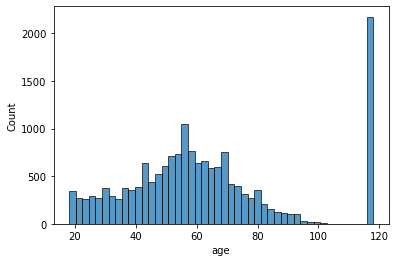

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


pd.set_option('mode.chained_assignment',  None)
pd.set_option('display.max_columns', None)


prof = prof = pd.read_csv("profile.csv")
prof.head()

#there are some null values in the 'profile'.
prof.isna().sum()

sns.histplot(data=prof, x='age')
plt.show()

Here we see a higher number of unsually high (or old) aged people in our 'profile' data set. 

We will now take a closer look and check the statistical information of 'profile'

In [5]:
prof['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

We were able to find that the suspicious high age seems to be 118 years old.

Interestingly, the customers who have suspiciously high age also have the null value in 'gender' and 'income'.
This means it is natural that weremove them from the original 'profile' for the future.

So, the cleaned 'profile' looks like this:

In [6]:
prof = prof.dropna()
prof.head()

,Unnamed: 0,gender,age,id,became_member_on,income
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


Now we will find the GENDER DISTRIBUTION using the column 'gender' in the 'profile'.

First, we will observe the gender count then proceed to the proportion. 

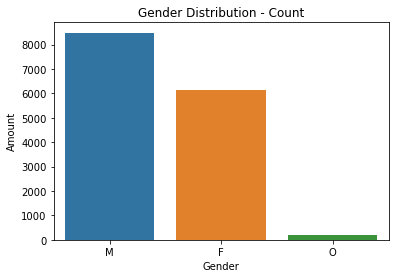

In [7]:
#drop unnamed:0 column from all dataframes
#prof.drop('Unnamed: 0', axis=1, inplace=True)
#sns.countplot(prof['gender'])

#see gender count

sns.barplot(x=prof['gender'].value_counts().index, y=prof['gender'].value_counts())
plt.title('Gender Distribution - Count')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()



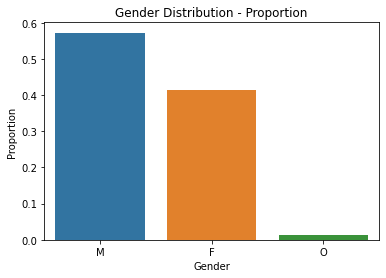

In [8]:
#see proportion of genders
sns.barplot(x=prof['gender'].value_counts().index, y=prof['gender'].value_counts(normalize=True))
plt.title('Gender Distribution - Proportion')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

From the variable description, some entries contain 'O' for other rather than 'M' or 'F'.
The gender distirbution is like above, the customers consists of about 57% of male, 40% of female and 3% of the 3rd other sex. 
So, it looks like there are more male Starbucks customers than female Starbucks customers.

Now we will analyze the income dsitribution by using the 'income column' in the 'profile'.

Recall that all the missing income were from the 'other' group, because I made every person with no gender as 'other'.

First, we will plot a box plot chart to give us an indication of how spread out the values in the data are. 

Text(0.5, 1.0, 'Customer Income Spread')

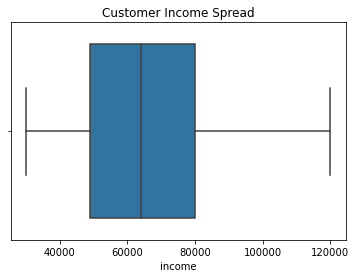

In [9]:
sns.boxplot(data=prof, x='income')
plt.title('Customer Income Spread')

Next, 

Text(0.5, 1.0, 'Income per gender')

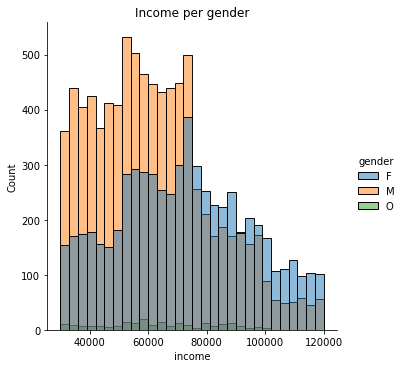

In [10]:
sns.displot(prof, x='income', hue='gender', bins=30)
plt.title('Income per gender')

Text(0, 0.5, 'Income Amount (* 1e8)')

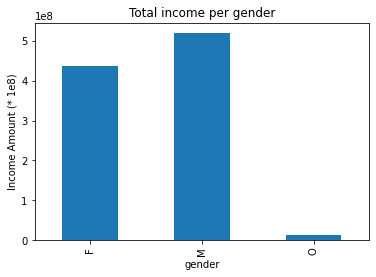

In [11]:
prof.groupby('gender').sum()['income'].plot(kind='bar')
plt.title('Total income per gender')
plt.ylabel('Income Amount (* 1e8)')

From these two charts, we can see that the total income for males is higher, despite the number of females in the higher income (75k or more) are greater than males.

Now, we will create a new 'log_income' column to use for comparison implenting log implemtation (log base 10) and plot the histogram.
And to finish off, we will also calculate the average mean income and median income for all customers, regardless of gender.

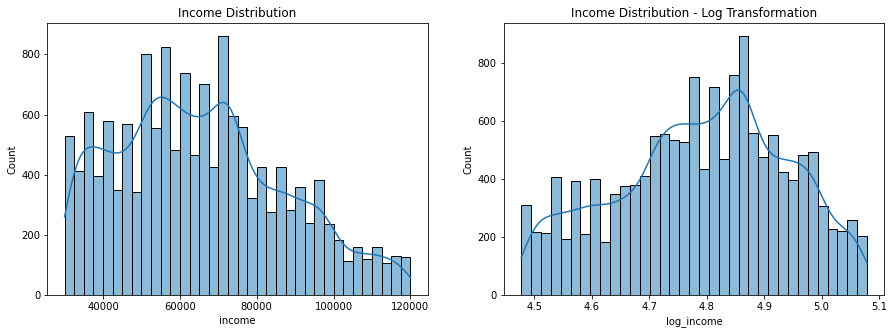

Average income is: $65404.992
Median income is: $64000.0


In [12]:
prof['log_income'] = prof['income'].apply(np.log10)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(['income', 'log_income']):
    sns.histplot(ax=axes[i], data=prof, x=col, kde=True)

axes[0].set_title('Income Distribution')
axes[1].set_title('Income Distribution - Log Transformation')
plt.show()

print('Average income is: ${}'.format(round(prof['income'].mean(), 3)))
print('Median income is: ${}'.format(prof['income'].median()))


Now we will find the average PURCHASE DISTRIBUTION. 

To accomplish this, we first need to merge 'profile' and 'transcript' data sets.

In [13]:
profile_transcript = prof.merge( right=trans, how='left', left_on='id', right_on='person')
profile_transcript.head()

,Unnamed: 0_x,gender,age,id,became_member_on,income,log_income,Unnamed: 0_y,person,event,value,time
0,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,20282,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 21.51},18
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,49501,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 32.28},144
2,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,150597,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408
3,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,201571,0610b486422d4921ae7d2bf64640c50b,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504
4,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,227842,0610b486422d4921ae7d2bf64640c50b,transaction,{'amount': 23.22},528


The amount of money spent information is located in the 'transcript -> value whose event == transaction -> amount'.
After that, we extract the amount paid using a regular expression module (re).

In [14]:
import re

transaction = profile_transcript.loc[profile_transcript['event'] == 'transaction']
offer = profile_transcript.loc[profile_transcript['event'] != 'transaction']

pattern = re.compile('[\d]+.[\d]+')
transaction['value'] = transaction['value'].apply(pattern.findall).str.get(0)
transaction.rename(columns={'value': 'amount'}, inplace=True)
transaction = transaction.astype(dtype={'amount': 'float'})

transaction.head()


,Unnamed: 0_x,gender,age,id,became_member_on,income,log_income,Unnamed: 0_y,person,event,amount,time
0,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,20282,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,49501,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144
4,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,5.049218,227842,0610b486422d4921ae7d2bf64640c50b,transaction,23.22,528
8,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,5.000000,47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132
10,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,5.000000,49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144


Now, we will make a Pivot Table that contains the average mean purchase amount by each Starbucks member.
Also, we will be adding each member's demographic status by merging the pivot table with 'profile':

In [15]:
mean_amount_by_member = pd.pivot_table(data=transaction, values='amount', index='id', aggfunc='mean').reset_index()
mean_amount_by_member

mean_amount_by_member = mean_amount_by_member.merge(right=prof, how='left', on='id')
mean_amount_by_member.head()


,id,amount,Unnamed: 0,gender,age,became_member_on,income,log_income
0,0009655768c64bdeb2e877511632db8f,15.950000,3793,M,33,20170421,72000.0,4.857332
1,0011e0d4e6b944f998e987f904e8c1e5,15.892000,4201,O,40,20180109,57000.0,4.755875
2,0020c2b971eb4e9188eac86d93036a77,24.607500,2563,F,59,20160304,90000.0,4.954243
3,0020ccbbb6d84e358d3414a3ff76cffd,12.837500,8413,F,24,20161111,60000.0,4.778151
4,003d66b6608740288d6cc97a6903f4f0,2.685556,10128,F,26,20170621,73000.0,4.863323


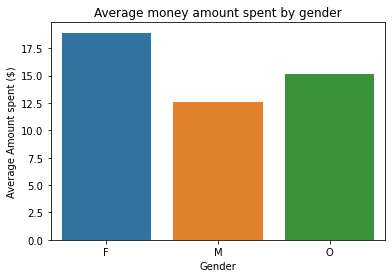

In [16]:
amount_by_gender = mean_amount_by_member.groupby(by='gender').mean()['amount']

sns.barplot(x = amount_by_gender.index, y = amount_by_gender)

plt.title('Average money amount spent by gender')
plt.xlabel('Gender')
plt.ylabel('Average Amount spent ($)')
plt.show()

From this, we see that Starbucks female customers spend, on average, $5 more than male customers at Starbucks. 

In [17]:
#format the date to see the month, day, and years frequency of offers 
prof['became_member_on'] = pd.to_datetime(prof['became_member_on'].astype(str), format='%Y-%m-%d')
prof['year'] = prof['became_member_on'].dt.year
prof['month'] = prof['became_member_on'].dt.month
prof['day']=prof['became_member_on'].dt.day_name()
prof['member_since_how_manydays'] = (pd.to_datetime('today') - prof['became_member_on']).astype('timedelta64[D]').astype(int)
prof.rename(columns={'id': 'customer_id'}, inplace=True)
prof.head().reset_index()

,index,Unnamed: 0,gender,age,customer_id,became_member_on,income,log_income,year,month,day,member_since_how_manydays
0,1,1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,Saturday,1788
1,3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,Tuesday,1855
2,5,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,4.845098,2018,4,Thursday,1503
3,8,8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,4.724276,2018,2,Friday,1579
4,12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,4.707570,2017,11,Saturday,1669


Text(0.5, 1.0, 'Frequency of Members Joined per Month')

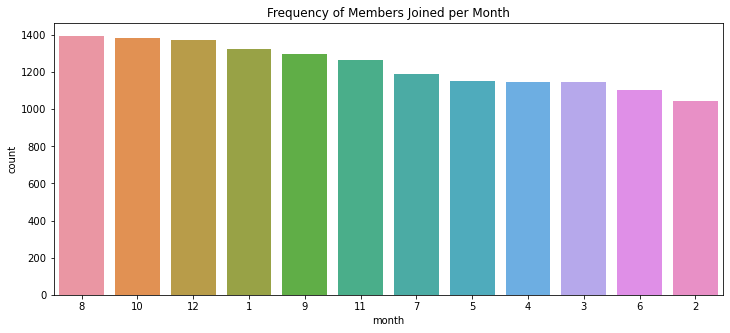

In [18]:
fig = plt.figure(figsize = (12,5))
sns.countplot(x='month', data=prof, order=prof['month'].value_counts().index[0:15])
plt.title('Frequency of Members Joined per Month')

Text(0.5, 1.0, 'Frequency of Members Joined per Day')

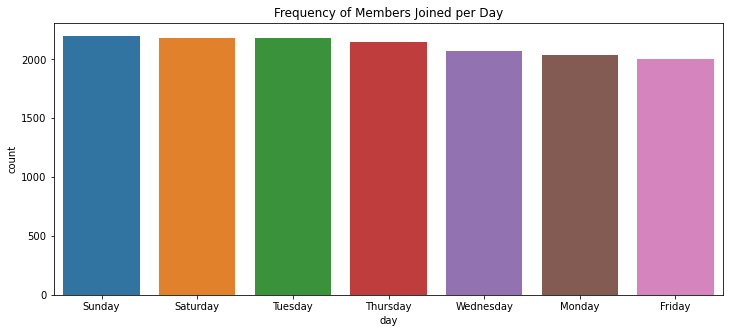

In [19]:
fig = plt.figure(figsize = (12,5))
sns.countplot(x='day', data=prof, order=prof['day'].value_counts().index[0:15])
plt.title('Frequency of Members Joined per Day')


Text(0.5, 1.0, 'Frequency of Members Joined per Year')

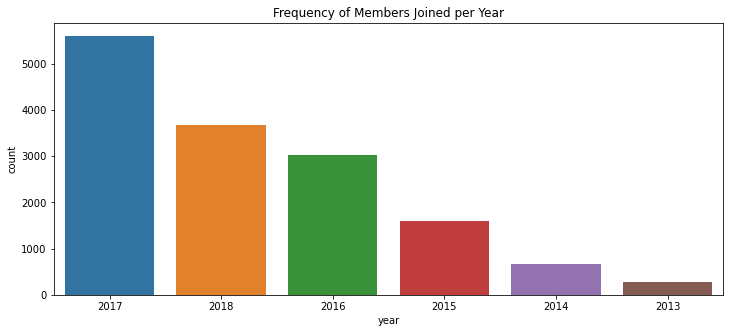

In [20]:
fig = plt.figure(figsize = (12,5))
sns.countplot(x='year', data=prof, order=prof['year'].value_counts().index[0:15])
plt.title('Frequency of Members Joined per Year')

The 'Frequency of Members Joined per Month' graph shows that August had the highest number of members join which was about 1400 members. Furthermore, the 'Frequency of Members Joined per Day' graph shows that Sunday had the highest number of memmbers join, which was about 2300 members. Lastly, the 'Frequency of Members Joined per Year' graph shows that 2017 had the highest number of memmbers join, which was about 5600 members.

In [21]:
prof.age.min()
prof.age.max()
prof.age.dtype

dtype('int64')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '18-28 years old'),
  Text(1, 0, '28-38 years old'),
  Text(2, 0, '38-48 years old'),
  Text(3, 0, '48-58 years old'),
  Text(4, 0, '58-68 years old'),
  Text(5, 0, '68-78 years old'),
  Text(6, 0, '78-88 years old'),
  Text(7, 0, '88-98 years old'),
  Text(8, 0, '98-101 years old')])

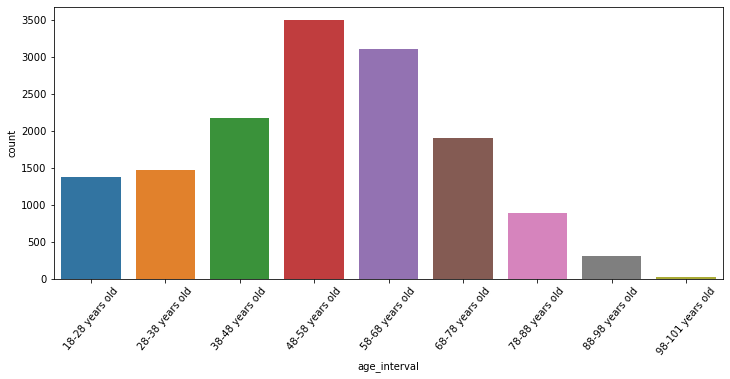

In [22]:
#find the age interval which had the highest offers 
prof['age_interval'] = pd.cut(x=prof['age'], bins=[18, 28, 38, 48, 58, 68, 78, 88, 98, 101],
                    labels=['18-28 years old', '28-38 years old', '38-48 years old', 
                           '48-58 years old', '58-68 years old', '68-78 years old', 
                           '78-88 years old', '88-98 years old', '98-101 years old'])

fig = plt.figure(figsize = (12,5))
sns.countplot(x='age_interval', data=prof)
plt.xticks(rotation=50)

The age group of 48-58 years old had the highest frequency of being Starbucks customers. 

Transcript EDA

<AxesSubplot:>

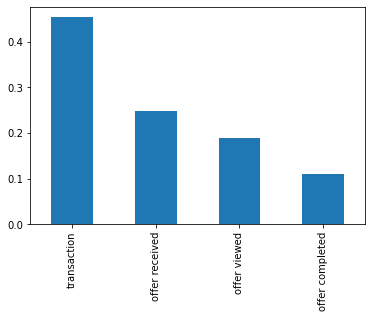

In [23]:
trans.event.value_counts(normalize = True).plot.bar()

According to the bar graph we can see that there were more transactions than offer viewed, offer recieved, and offer completed. This maeans that 45% of the offers are in transaction, 25% of the offers have been recieved, 19% of the offers have been viewed, and only 11% of the offers are completed. 

Text(0.5, 1.0, 'Number of Offers per time interval')

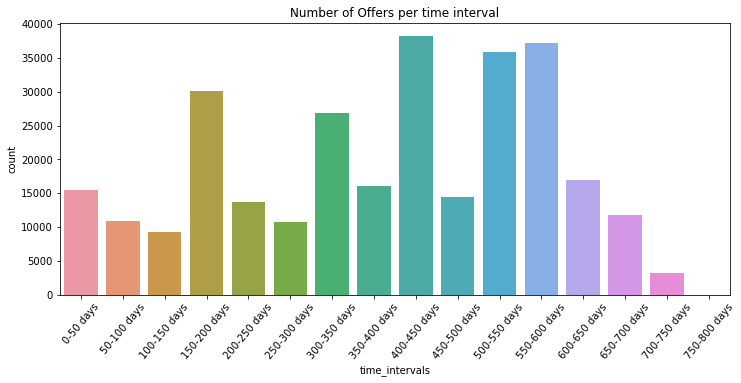

In [24]:
#find which time intervals had the highest offers
#make the time intervals into bins 
trans['time_intervals'] = pd.cut(trans['time'], 
                                    [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800],
                                labels=['0-50 days', '50-100 days', '100-150 days', '150-200 days', 
                                       '200-250 days', '250-300 days', '300-350 days', '350-400 days',
                                       '400-450 days', '450-500 days', '500-550 days', '550-600 days', 
                                       '600-650 days', '650-700 days', '700-750 days', '750-800 days'])

fig = plt.figure(figsize = (12,5))
sns.countplot(x='time_intervals', data=trans)
plt.xticks(rotation=50)
plt.title('Number of Offers per time interval')

According to the bar graph 400-450 days had the highest offers of around 35700 offers. 

<AxesSubplot:xlabel='gender'>

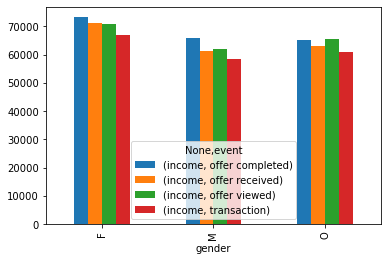

In [25]:
profile_transcript.pivot_table(values=["income"], index=["gender"], columns = ['event']).plot.bar()

<AxesSubplot:xlabel='gender', ylabel='event'>

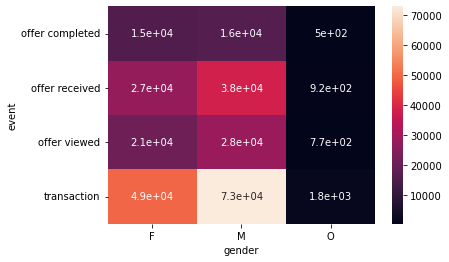

In [26]:
cross = pd.crosstab(profile_transcript["event"],profile_transcript["gender"] )
sns.heatmap(cross, annot = True)

Predicting how much a customer will spend based on the age, income, and sex:

In [27]:
#since we are predciting transactions, we seperate the transactions from the rest of the dataset
moneySpent = trans[trans["event"] == "transaction"].copy().reset_index()
prof
#merge profile and transcript by customer id so that we have demographics of each person who made a transaction
moneySpent = moneySpent.merge(prof, left_on="person", right_on="customer_id")[["person", "value", "age", "income", "gender", "became_member_on"]]
moneySpent["value"] = moneySpent["value"].str.replace("{", "", regex = True)
moneySpent["value"] = moneySpent["value"].str.replace("}", "", regex = True)
moneySpent["value"] = moneySpent["value"].str.replace("amount", "", regex = True)
moneySpent["value"] = moneySpent["value"].str.replace(":", "", regex = True)
moneySpent["value"] = moneySpent["value"].str.replace("''", "", regex = True)
moneySpent["value"] = moneySpent["value"].astype(float)

#creating one hot encoding for gender
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
data = asarray([['F'], ['M'], ['O']])
print(data)

encoder = OneHotEncoder(sparse=False)

onehot = encoder.fit_transform(data)
print(onehot)

#implement onehot
moneySpent["F"] = moneySpent["gender"].copy()
moneySpent["M"] = moneySpent["gender"].copy()
moneySpent["O"] = moneySpent["gender"].copy()

moneySpent["F"] = moneySpent["F"].replace("F", 1)
moneySpent["F"] = moneySpent["F"].replace("M", 0)
moneySpent["F"] = moneySpent["F"].replace("O", 0)
moneySpent["F"]  = moneySpent["F"].fillna(0)
moneySpent["F"]  = moneySpent["F"].astype(int)


moneySpent["M"] = moneySpent["M"].replace("M", 1)
moneySpent["M"] = moneySpent["M"].replace("F", 0)
moneySpent["M"] = moneySpent["M"].replace("O", 0)
moneySpent["M"]  = moneySpent["M"].fillna(0)
moneySpent["M"]  = moneySpent["M"].astype(int)


moneySpent["O"] = moneySpent["O"].replace("O", 1)
moneySpent["O"] = moneySpent["O"].replace("M", 0)
moneySpent["O"] = moneySpent["O"].replace("F", 0)
moneySpent["O"]  = moneySpent["O"].fillna(0)
moneySpent["O"]  = moneySpent["O"].astype(int)


moneySpent["gender"]  = moneySpent["gender"].replace("F", True)
moneySpent["gender"]  = moneySpent["gender"].replace("M", True)
moneySpent["gender"]  = moneySpent["gender"].replace("O", True)
moneySpent["gender"]  = moneySpent["gender"].fillna(False)
moneySpent["gender"]  = moneySpent["gender"].astype(bool)


# splitting member date into month, year, day
datetimes = pd.to_datetime(moneySpent["became_member_on"])
moneySpent["day"] = datetimes.dt.day
moneySpent["month"] = datetimes.dt.month
moneySpent["year"] = datetimes.dt.year


moneySpent = moneySpent.dropna(subset=["income"])

del moneySpent["person"]
moneySpent = moneySpent.reset_index()
#cleaning is done, time to implement knn
moneySpent

[['F']
 ['M']
 ['O']]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


,index,value,age,income,gender,became_member_on,F,M,O,day,month,year
0,0,0.83,20,30000.0,True,2016-07-11,1,0,0,11,7,2016
1,1,1.44,20,30000.0,True,2016-07-11,1,0,0,11,7,2016
2,2,4.56,20,30000.0,True,2016-07-11,1,0,0,11,7,2016
3,3,1.53,20,30000.0,True,2016-07-11,1,0,0,11,7,2016
4,4,0.50,20,30000.0,True,2016-07-11,1,0,0,11,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
123952,123952,14.68,72,74000.0,True,2018-03-18,1,0,0,18,3,2018
123953,123953,3.19,50,60000.0,True,2018-01-07,0,1,0,7,1,2018
123954,123954,15.35,73,65000.0,True,2018-05-01,1,0,0,1,5,2018
123955,123955,0.76,42,69000.0,True,2017-11-04,0,1,0,4,11,2017


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

X = moneySpent[["age", "income", "F", "M", "O", "month", "year", "day"]]

#standardize y value 
moneySpent["log(value)"] = np.log10(moneySpent["value"])
y = pd.DataFrame()
y["log(value)"] = moneySpent["log(value)"]
#y = moneySpent["value"]

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

#standardize features
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()



In [29]:
#create elbow curve to determine K
err = []
for K in range(10):
    K = K+1
    temp_model = neighbors.KNeighborsRegressor(n_neighbors = K)
    temp_model.fit(X_train, y_train)  #fit the model
    pred=temp_model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred))
    err.append(error)

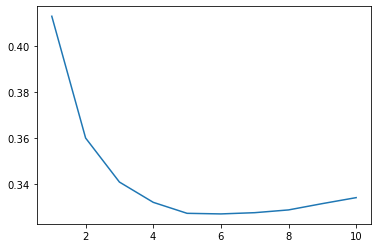

In [30]:
index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(index, err)

In [31]:
K = 5
knn = neighbors.KNeighborsRegressor(n_neighbors = K)
knn.fit(X_train, y_train)  #fit the model
knn.predict(X_test)

array([[0.93914682],
       [0.2498174 ],
       [1.03224322],
       ...,
       [0.81788891],
       [0.27332381],
       [1.31231076]])

<AxesSubplot:xlabel='age', ylabel='value'>

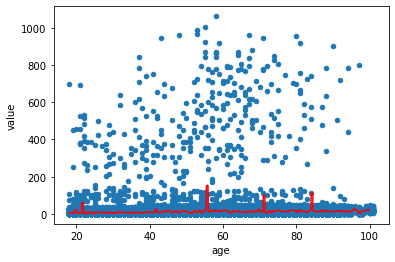

In [32]:
# Define a grid of feature values.
train, test = train_test_split(moneySpent, test_size = .2)

X_train_age = train[["age"]]
y_train_age = train["value"]

model = neighbors.KNeighborsRegressor(n_neighbors=K)
model.fit(X=X_train_age, y=y_train_age)

X_new = pd.DataFrame()
X_new["age"] = np.linspace(18,100, num=1000)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["age"]
)


# Plot the predictions.
train.plot.scatter(x="age", y="value")
y_new_.plot.line(color = "red")

<AxesSubplot:xlabel='income', ylabel='value'>

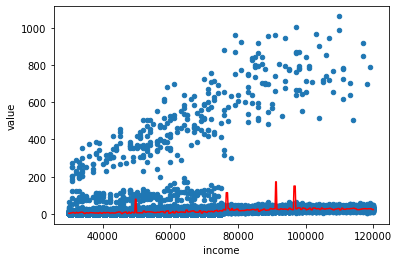

In [33]:
X_train_income = train[["income"]]
y_train_income = train["value"]

model = neighbors.KNeighborsRegressor(n_neighbors=K)
model.fit(X=X_train_income, y=y_train_income)

X_new = pd.DataFrame()
X_new["income"] = np.linspace(train["income"].min(),train["income"].max(), num=500)

# Make predictions at those feature values.
y_new_ = pd.Series(
    model.predict(X_new),
    index=X_new["income"]
)


# Plot the predictions.
train.plot.scatter(x="income", y="value")
y_new_.plot.line(color = "red")

<AxesSubplot:xlabel='age', ylabel='income'>

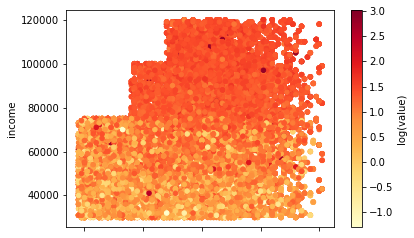

In [34]:
import matplotlib.cm as cm
train.plot.scatter(x="age", y="income", c="log(value)", cmap=cm.YlOrRd)